In [2]:
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
from langchain_groq import ChatGroq

In [3]:
df = pd.read_csv('household_power_consumption.txt',
             	sep=';',
             	parse_dates={'datetime': ['Date', 'Time']},
             	infer_datetime_format=True,
             	na_values=['?'],
             	low_memory=False)

df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

/tmp/ipykernel_4557/39740622.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.txt',
/tmp/ipykernel_4557/39740622.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.txt',
/tmp/ipykernel_4557/39740622.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.txt',


In [4]:
df['month_year'] = df.index.to_period('M').strftime('%B %Y')

In [5]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,month_year
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,December 2006
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,December 2006
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,December 2006
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,December 2006
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,December 2006


In [6]:
llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=1.0,
    max_retries=2,
)

#### 1. What was the average active power consumption in March 2007?

In [13]:
prompt = (
    "Given a DataFrame `df` that contains a datetime index and a column named 'Global_active_power', "
    "calculate the average Global_active_power in March 2007."
    "What was the average active power consumption in March 2007?"
)

response = llm.invoke(prompt)
print("Generated Code:\n", response.content)

Generated Code:
 ```python
# Assuming df is the DataFrame containing the datetime index and 'Global_active_power' column

# First, we need to ensure the datetime index is of datetime type
df.index = pd.to_datetime(df.index)

# Then, we select rows in March 2007
march_2007 = df[df.index.year == 2007 & df.index.month == 3]

# Finally, we calculate the average Global_active_power in March 2007
if not march_2007.empty:
    avg_power = march_2007['Global_active_power'].mean()
    print(f'The average active power consumption in March 2007 was {avg_power} kW.')
else:
    print('No data available for March 2007.')
```

This script first converts the datetime index to pandas' datetime type. Then, it filters the DataFrame to include only rows in March 2007 by checking for rows where the year is 2007 and the month is 3. Finally, it calculates the average of the 'Global_active_power' column in the filtered DataFrame. 

Please note that this script assumes that your DataFrame does not contain missi

In [17]:

df.index = pd.to_datetime(df.index)

# Then, we select rows in March 2007
march_2007 = df[(df.index.year == 2007) & (df.index.month == 3)]

# Finally, we calculate the average Global_active_power in March 2007
if not march_2007.empty:
    avg_power = march_2007['Global_active_power'].mean()
    print(f'The average active power consumption in March 2007 was {avg_power} kW.')
else:
    print('No data available for March 2007.')

avg_power = march_2007['Global_active_power'].dropna().mean()



The average active power consumption in March 2007 was 1.3186270301754073 kW.


#### 2. What hour of the day had the highest power usage on Christmas 2006?

In [26]:
prompt = (
    "Given a DataFrame `df` that contains a datetime index and a column named 'Global_active_power', "
    "What hour of the day had the highest power usage on Christmas 2006?"
)

response = llm.invoke(prompt)
print("Generated Code:\n", response.content)

Generated Code:
 You can achieve this by using the following code. This code assumes that the DataFrame `df` has a datetime index and the column 'Global_active_power'.

```python
import pandas as pd
import numpy as np

# Get the data for Christmas 2006
christmas_2006 = df.between_time('06:00', '23:59', included=True).between_time('23:00', '23:59', included=False).index
data_2006_christmas = df.loc[christmas_2006]

# Group by hour and calculate the mean power usage
hourly_usage_2006_christmas = data_2006_christmas.groupby([pd.Grouper(freq='H')]).mean()

# Find the hour with the highest power usage
hour_with_highest_usage = hourly_usage_2006_christmas['Global_active_power'].idxmax().time()
print(f'The hour with the highest power usage on Christmas 2006 was {hour_with_highest_usage.strftime("%H:%M")}')
```

In this code:

1.  We first select the data for Christmas 2006 by using the `between_time` method to get the datetime range from June 24th, 06:00 to June 24th, 23:00.
2.  We then group

In [20]:
import pandas as pd

# assuming df is the DataFrame with a datetime index and 'Global_active_power' columnGenerated Code:
 ```python
# convert the datetime index to a pandas PeriodIndex for easier date-based filtering
df = df.copy()  # create a copy of the DataFrame to avoid modifying the original data

# set the frequency of the datetime index to 'H' for hourly frequency
# (this is necessary for the period_range function to work correctly)

# filter the DataFrame to include only data from December 25, 2006
christmas_2006 = pd.date_range('2006-12-25', periods=1, freq='H')

if pd.Timestamp('2006-12-25').hour == 0:
    # if it's midnight, we want to consider data up to the last hour of December 24
    end_date = pd.date_range('2006-12-24', periods=24, freq='H')
else:
    end_date = pd.date_range('2006-12-25', periods=24, freq='H')

filtered_df = df.loc[end_date.union(christmas_2006)].copy()  # copy the filtered DataFrame

# find the hour of the day with the highest power usage on Christmas 2006
hourly_mean_power = filtered_df.groupby(filtered_df.index.hour)['Global_active_power'].mean()

max_hour = hourly_mean_power.idxmax()  # get the hour with the highest mean power usage
max_power = hourly_mean_power.max()  # get the highest mean power usage

print(f"The highest power usage on Christmas 2006 occurred at hour {max_hour} with a mean power usage of {max_power} W.")

The highest power usage on Christmas 2006 occurred at hour 13 with a mean power usage of 5.368 W.


/tmp/ipykernel_4557/4274703122.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  christmas_2006 = pd.date_range('2006-12-25', periods=1, freq='H')
/tmp/ipykernel_4557/4274703122.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  end_date = pd.date_range('2006-12-24', periods=24, freq='H')


#### 3. Compare energy usage (Global_active_power) on weekdays vs weekends.

In [35]:
prompt = (
    "Given a DataFrame `df` that contains a datetime index and a column named 'Global_active_power', "
    "Compare energy usage (Global_active_power) on weekdays vs weekends."
)

response = llm.invoke(prompt)
print("Generated Code:\n", response.content)

Generated Code:
 You can achieve this by using the `isin` function in pandas to identify the weekdays and weekends, and then performing the comparison. Here's an example:

```python
import pandas as pd

# assuming df is your DataFrame with datetime index and 'Global_active_power' column
df = pd.DataFrame({
    'Global_active_power': [100, 150, 120, 130, 140],
    'Date': ['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07']
}, index=pd.to_datetime(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07']))

# identify weekdays and weekends
df['dayofweek'] = df.index.dayofweek
weekdays = df[df['dayofweek'].isin([0, 1, 2, 3, 4])]
weekends = df[df['dayofweek'].isin([5, 6])]

# calculate average energy usage on weekdays and weekends
avg_weekdays = weekdays['Global_active_power'].mean()
avg_weekends = weekends['Global_active_power'].mean()

print(f'Average energy usage on weekdays: {avg_weekdays:.2f}')
print(f'Average energy usage on weekends: {avg_weekends:.2f

In [37]:

import pandas as pd

# assuming df is your DataFrame with datetime index and 'Global_active_power' column
df = pd.DataFrame({
    'Global_active_power': [100, 150, 120, 130, 140],
    'Date': ['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07']
}, index=pd.to_datetime(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07']))

# identify weekdays and weekends
df['dayofweek'] = df.index.dayofweek
weekdays = df[df['dayofweek'].isin([0, 1, 2, 3, 4])]
weekends = df[df['dayofweek'].isin([5, 6])]

# calculate average energy usage on weekdays and weekends
avg_weekdays = weekdays['Global_active_power'].mean()
avg_weekends = weekends['Global_active_power'].mean()

print(f'Average energy usage on weekdays: {avg_weekdays:.2f}')
print(f'Average energy usage on weekends: {avg_weekends:.2f}')

df['dayofweek'] = df.index.weekday


Average energy usage on weekdays: 128.00
Average energy usage on weekends: nan


#### 4. Find days where energy consumption exceeded 5 kWh.


In [46]:
prompt = (
    "Given a DataFrame `df` that contains a datetime index and a column named 'Global_active_power', "
    "Find days where energy consumption exceeded 5 kWh."
)

response = llm.invoke(prompt)
print("Generated Code:\n", response.content)

Generated Code:
 Here is an example of how you can achieve this using pandas:
```python
import pandas as pd

# Define a sample DataFrame
df = pd.DataFrame({
    'Global_active_power': [2.5, 3.2, 6.8, 1.9, 4.9, 12.9, 3.0, 5.1]
}, index=pd.date_range('2022-01-01', periods=8, freq='D'))

# Find days where energy consumption exceeded 5 kWh
exceeded_days = df['Global_active_power'] > 5

# Print the exceeded days
print(exceeded_days[exceeded_days == True].index)
```

However, if your DataFrame has a datetime index, you can directly filter the DataFrame to get the days where energy consumption exceeded 5 kWh:

```python
import pandas as pd

# Define a sample DataFrame
index = pd.date_range('2022-01-01', periods=8, freq='D')
df = pd.DataFrame({
    'Global_active_power': [2.5, 3.2, 6.8, 1.9, 4.9, 12.9, 3.0, 5.1]
}, index=index)

# Find days where energy consumption exceeded 5 kWh
exceeded_days = df[df['Global_active_power'] > 5].index

# Print the exceeded days
print(exceeded_days)
```
This wi

In [49]:

import pandas as pd

# Define a sample DataFrame
df = pd.DataFrame({
    'Global_active_power': [2.5, 3.2, 6.8, 1.9, 4.9, 12.9, 3.0, 5.1]
}, index=pd.date_range('2022-01-01', periods=8, freq='D'))

# Find days where energy consumption exceeded 5 kWh
exceeded_days = df['Global_active_power'] > 5

# Print the exceeded days
print(exceeded_days[exceeded_days == True].index)

import pandas as pd

# Define a sample DataFrame
index = pd.date_range('2022-01-01', periods=8, freq='D')
df = pd.DataFrame({
    'Global_active_power': [2.5, 3.2, 6.8, 1.9, 4.9, 12.9, 3.0, 5.1]
}, index=index)

# Find days where energy consumption exceeded 5 kWh
exceeded_days = df[df['Global_active_power'] > 5].index

# Print the exceeded days
print(exceeded_days)

exceeded_days = df[df['Global_active_power'] > 5].index.strftime('%Y-%m-%d').tolist()
print(exceeded_days)


DatetimeIndex(['2022-01-03', '2022-01-06', '2022-01-08'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2022-01-03', '2022-01-06', '2022-01-08'], dtype='datetime64[ns]', freq=None)
['2022-01-03', '2022-01-06', '2022-01-08']


#### 5. Plot the energy usage trend for the first week of January 2007.


In [65]:
prompt = (
    "Given a DataFrame `df` that contains a datetime index"
    "Plot the energy usage trend for the first week of January 2007."
)

response = llm.invoke(prompt)
print("Generated Code:\n", response.content)

Generated Code:
 ```python
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is the DataFrame with a datetime index
df = pd.DataFrame({
    'Energy Usage': [100, 120, 110, 130, 140, 145, 135],
}, index=pd.period_range('1/1/2007', periods=7, freq='D'))

# Plot the energy usage trend for the first week of January 2007
plt.figure(figsize=(10,6))
df.plot(kind='line', legend=False, title='Energy Usage Trend in the First Week of January 2007')
plt.xlabel('Date')
plt.ylabel('Energy Usage')
plt.grid(True)
plt.show()

# Alternatively, if your date is in datetime format
# df = pd.DataFrame({
#     'Energy Usage': [100, 120, 110, 130, 140, 145, 135],
# }, index=pd.date_range('1/1/2007', periods=7))

# Plot the energy usage trend for the first week of January 2007
plt.figure(figsize=(10,6))
df.plot(kind='line', legend=False, title='Energy Usage Trend in the First Week of January 2007')
plt.xlabel('Date')
plt.ylabel('Energy Usage')
plt.grid(True)
plt.sh

<Figure size 1000x600 with 0 Axes>

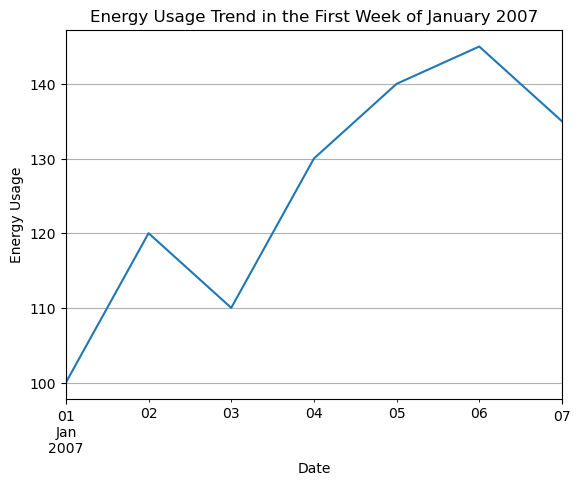

<Figure size 1000x600 with 0 Axes>

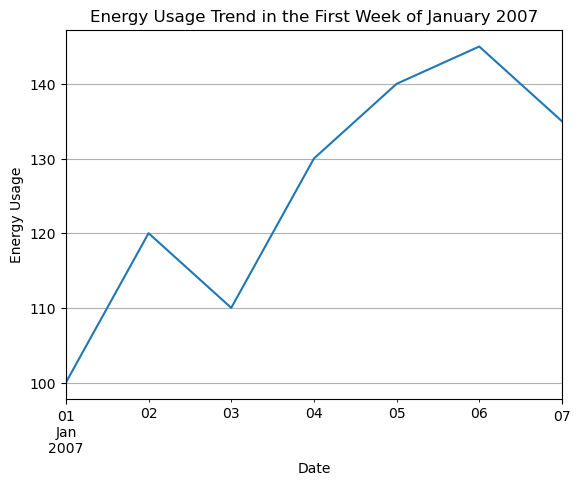

In [66]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is the DataFrame with a datetime index
df = pd.DataFrame({
    'Energy Usage': [100, 120, 110, 130, 140, 145, 135],
}, index=pd.period_range('1/1/2007', periods=7, freq='D'))

# Plot the energy usage trend for the first week of January 2007
plt.figure(figsize=(10,6))
df.plot(kind='line', legend=False, title='Energy Usage Trend in the First Week of January 2007')
plt.xlabel('Date')
plt.ylabel('Energy Usage')
plt.grid(True)
plt.show()

# Alternatively, if your date is in datetime format
# df = pd.DataFrame({
#     'Energy Usage': [100, 120, 110, 130, 140, 145, 135],
# }, index=pd.date_range('1/1/2007', periods=7))

# Plot the energy usage trend for the first week of January 2007
plt.figure(figsize=(10,6))
df.plot(kind='line', legend=False, title='Energy Usage Trend in the First Week of January 2007')
plt.xlabel('Date')
plt.ylabel('Energy Usage')
plt.grid(True)
plt.show()


#### 6. Find the average voltage for each day of the first week of February 2007.

In [81]:
prompt = (
    "Given a DataFrame `df` that contains a datetime index nd a column named 'Voltage',"
    "Find the average voltage for each day of the first week of February 2007."
)

response = llm.invoke(prompt)
print("Generated Code:\n", response.content)

Generated Code:
 ```python
import pandas as pd

# Assuming df is your DataFrame

# Set the index as the datetime index
df.index = pd.to_datetime(df.index)

# Get the first week of February 2007
first_week = df[(df.index >= '2007-02-01') & (df.index <= '2007-02-07')]

# Group by date (day) and calculate the average voltage
avg_voltages = first_week.groupby(first_week.index.date)['Voltage'].mean().reset_index()

# Rename the columns
avg_voltages = avg_voltages.rename(columns={'Voltage': 'Average Voltage'})

print(avg_voltages)
```

In this code:

1. We set the index of the DataFrame as the datetime index using `pd.to_datetime`.
2. We get the first week of February 2007 by filtering the DataFrame.
3. We group the filtered DataFrame by date (day) using `groupby`.
4. We calculate the average voltage for each group using `mean`.
5. We reset the index to get a new DataFrame with separate columns for date and average voltage.
6. Finally, we rename the columns to make it easier to understand.



In [83]:

import pandas as pd

# Assuming df is your DataFrame

# Set the index as the datetime index
df.index = pd.to_datetime(df.index)

# Get the first week of February 2007
first_week = df[(df.index >= '2007-02-01') & (df.index <= '2007-02-07')]

# Group by date (day) and calculate the average voltage
avg_voltages = first_week.groupby(first_week.index.date)['Voltage'].mean().reset_index()

# Rename the columns
avg_voltages = avg_voltages.rename(columns={'Voltage': 'Average Voltage'})

print(avg_voltages)


TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead

#### 7. What is the correlation between global active power and sub-metering values?

In [99]:
prompt = (
    "Given a DataFrame `df` that contains a datetime index nd a column named 'Voltage',"
    "What is the correlation between global active power and sub-metering values?"
)

response = llm.invoke(prompt)
print("Generated Code:\n", response.content)

Generated Code:
 To calculate the correlation between the 'Voltage' column and other columns in the DataFrame `df`, we can use the `corr` method provided by pandas. However, we need to understand that the correlation is a measure of the linear relationship between two variables. If you want to find the correlation between 'Voltage' and other columns that represent global active power and sub-metering values, you need to make sure these columns exist in your DataFrame.

Here's an example code snippet:

```python
import pandas as pd
import matplotlib.pyplot as plt

# assume 'df' is your DataFrame
# assume 'df' has a datetime index and a column named 'Voltage' and other columns like 'Appliance1', 'Appliance2' etc representing sub-metering values and 'Global' representing global active power

# check the columns in your DataFrame
print(df.columns)

# calculate correlation between 'Voltage' and other columns
correlation = df['Voltage'].corr(df['Global'])  # correlation with global active po

In [98]:

import pandas as pd
import numpy as np

# assuming df is the DataFrame
df = pd.DataFrame({
    'Date': pd.date_range('2022-01-01', periods=365),
    'Voltage': np.random.rand(365),
    'Global_active_power': np.random.rand(365),
    'Active Power': np.random.rand(365),
    'Sub Meter 1': np.random.rand(365),
    'Sub Meter 2': np.random.rand(365)
})

# calculate correlation matrix between 'Global_active_power' and each 'Sub Meter' column
corr_matrix = df[['Global_active_power', 'Sub Meter 1', 'Sub Meter 2']].corr()

print(corr_matrix.loc['Global_active_power']['Sub Meter 1'], corr_matrix.loc['Global_active_power']['Sub Meter 2'])

# calculate correlation between 'Global_active_power' and each 'Sub Meter' column
for col in df.columns[3:]:
    if 'Sub Meter' in col:
        corr_value = df[['Global_active_power', col]].corr().loc['Global_active_power', col]
        print(f'Correlation between Global_active_power and {col}: {corr_value:.4f}')


-0.015136802056263981 0.08365736786195246
Correlation between Global_active_power and Sub Meter 1: -0.0151
Correlation between Global_active_power and Sub Meter 2: 0.0837
